In [2]:
import os, sys

In [19]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype, Resize, Normalize
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
sys.path.append('../../')
from gans_collection.models import DCGanGenerator, DCGanDiscriminator, DCGanTrainer

In [14]:
BATCH_SIZE = 64
Z_DIM = 100
IM_SHAPE = (1,64,64)
FEATURES_D = 128
FEATURES_G = 128
EPOCHS = 10
CRITIC_INTERATIONS = 1

In [20]:
custom_transforms = Compose([
    ToTensor(),
    Resize(IM_SHAPE[-1], antialias=None),
    ConvertImageDtype(torch.float32),
    Normalize(0.5, 0.5)
])

dataset = datasets.MNIST(
    root='../../data', download=True,
    transform=custom_transforms)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
generator = DCGanGenerator(Z_DIM, IM_SHAPE, FEATURES_G).to(device)
discriminator =  DCGanDiscriminator(IM_SHAPE, FEATURES_D).to(device)
DCGanTrainer(EPOCHS, generator, discriminator, loader, CRITIC_INTERATIONS, device=device)

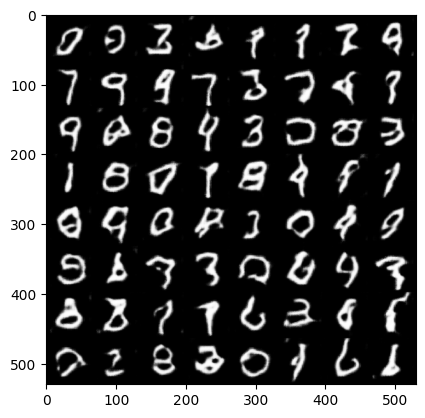

In [33]:
noise = torch.randn([BATCH_SIZE, Z_DIM]).to(device)
img = make_grid(generator(noise), normalize=True).detach().cpu().numpy().transpose([1,2,0])
plt.imshow(img,vmin=0, vmax=1, cmap='gray')
plt.show()